## solución para el oscilador armónico simple

Comenzaremos solucionando vía RK la ecuación diferencial

In [134]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [135]:
#paqueterias
import math as math
import numpy as np
import matplotlib.pyplot as plt
import time

In [136]:
#declaración de constantes
beginning = time.perf_counter()#comienzo del contador de tiempo
#intento de runge-kutta 3r orden

n = 30000 #numero de iteraciones
tf=5*np.pi #tiempo final
t0 = 0 #tiempo inicial en segundos[s]
theta0= 1 #condición inicial de theta
v0 = 0
g = 9.81 #aceleración de la gravedad en [m/s2]
l = 1 #longitud del péndulo en [m]
k = -g/l
dt =(tf-t0)/n #tamaño del diferencial de tiempo

constantes = time.perf_counter() #primer corte de timepo en las constantes

ContadorConstantes = constantes - beginning #cuenta cuanto tiempo tardó en calcular desde su inicio hasta el corte


In [137]:
#definimos las variables

t = np.arange(t0,tf+dt,dt) #tiempo en el que mediremos nuestro péndulo, de 0s a 180s
theta = np.zeros(len(t))
v = np.zeros(len(t))
theta[0] = theta0
v[0] = v0

In [138]:
for i in range(1,len(t)):
    
    dv=k*np.sin(theta[i-1])
#primer correccion
    j1=dt*dv
    dv = k*np.sin(theta[i-1] + dt/2) + j1/2
   # dv1=j1/2 + dv
#segunda correccion
    j2 = dt*(dv)
    dv = k*np.sin(theta[i-1] + dt/2) + j2/2
#    dv1 = j2/2 + dv
#tercera correccion
    j3= dt*dv 
    dv = j3 + k*np.sin(theta[i-1] + dt)
#cuarta correccion
    j4 = dt*(dv)
    
    v[i] = v[i-1] + (j1 + 2*j2 + 2*j3 + j4)/6
    theta[i] = theta[i-1] + dt*v[i-1]

El tiempo transcurrido para Runge-Kutta es: 4.7198185


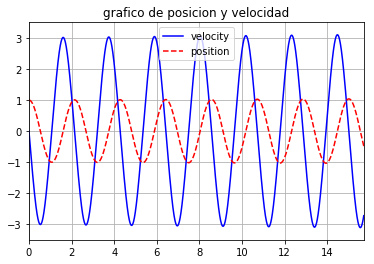

In [139]:
fig, ax = plt.subplots()
plt.title('grafico de posicion y velocidad')
plt.grid()
plt.axis([0, 5*np.pi,-3.5,3.5])
ax.plot(t, v, '-b', label='velocity')
ax.plot(t, theta, '--r', label='position')
leg = ax.legend();

CorteRK = time.perf_counter()
print('El tiempo transcurrido para Runge-Kutta es:',CorteRK)

Ahora necesitamos comparar nuestros resultados con algo más. Usaremos naively los resultados del oscilador armónico simple de ángulos pequeños, para esto necesitamos usar nuestro método anterior pero con la ecuación diferencial para ángulos pequeños

In [140]:
#definimos las variables

thetaP = np.zeros(len(t))
vP = np.zeros(len(t))
thetaP[0] = theta0
vP[0] = v0

for i in range(1,len(t)):
    
    dvP=k*thetaP[i-1]
#primer correccion
    k1=dt*dvP
    dvP = k*(thetaP[i-1] + dt/2) + k1/2
   # dv1=j1/2 + dv
#segunda correccion
    k2 = dt*(dvP)
    dvP = k*(thetaP[i-1] + dt/2) + k2/2
#    dv1 = j2/2 + dv
#tercera correccion
    k3= dt*dvP 
    dvP = k3 + k*(thetaP[i-1] + dt)
#cuarta correccion
    k4 = dt*(dvP)
    
    vP[i] = vP[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    thetaP[i] = theta[i-1] + dt*v[i-1]

El tiempo transcurrido para Runge-Kutta de angulos pequenos es: 1.9521254000000003


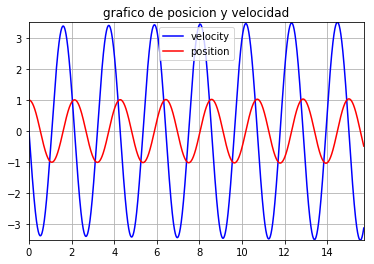

In [141]:
fig, ax = plt.subplots()
plt.title('grafico de posicion y velocidad')
plt.grid()
plt.axis([0, 5*np.pi,-3.5,3.5])
ax.plot(t, vP, 'b', label='velocity')
ax.plot(t, thetaP, 'r', label='position')
leg = ax.legend();

CorteRKPequeno = time.perf_counter()
contadorRKpeque = CorteRKPequeno - CorteRK + ContadorConstantes
print('El tiempo transcurrido para Runge-Kutta de angulos pequenos es:',contadorRKpeque)

Aquí está la solución analítica para ángulos pequeños

El tiempo transcurrido para la solución analitica de angulos pequenos es: 2.5544436999999998


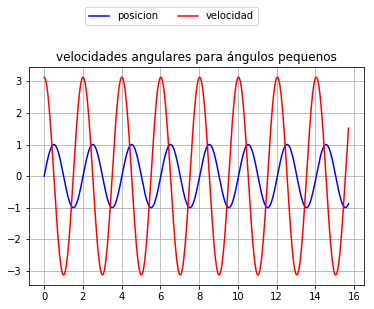

In [142]:
Theta = np.sin(((-k)**(1/2))*t) #ecuación de posición
#print('theta',np.sin(t))
dTheta = ((-k)**(1/2))*np.cos(((-k)**(1/2))*t) #ecuación de la velocidad
ddTheta = (-k)*np.sin(((-k)**(1/2))*t) #ecn. de aceleración

#angulo = plt.figure
#velocidad = plt.figure
#aceleracion = plt.figure

fig, ax = plt.subplots()
plt.title('velocidades angulares para ángulos pequenos')
plt.grid()
ax.plot(t, Theta, 'b', label='posicion')
ax.plot(t, dTheta, 'r', label='velocidad')
plt.legend(bbox_to_anchor =(0.7, 1.3), ncol = 2)  #posición de la caja de leyenda


CorteSolAnaliticaPeque= time.perf_counter()
contadoranalitico = CorteSolAnaliticaPeque - CorteRKPequeno + ContadorConstantes
print('El tiempo transcurrido para la solución analitica de angulos pequenos es:',contadoranalitico)


Ahora comparamos ambos gráficos

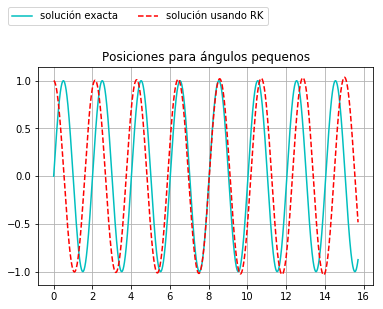

In [143]:
fig, ax = plt.subplots()
plt.title('Posiciones para ángulos pequenos')
plt.grid()
ax.plot(t, Theta, '-c', label='solución exacta')
ax.plot(t, thetaP, '--r', label='solución usando RK')
plt.legend(bbox_to_anchor =(0.7, 1.3), ncol = 2) #posición de la caja de leyenda
   


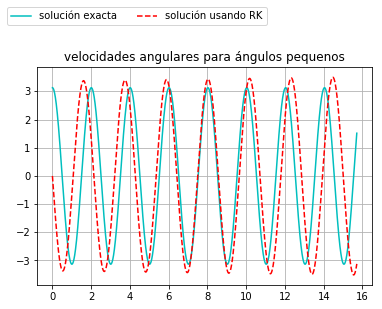

In [144]:
fig, ax = plt.subplots()
plt.title('velocidades angulares para ángulos pequenos')
plt.grid()
ax.plot(t, dTheta, '-c', label='solución exacta')
ax.plot(t, vP, '--r', label='solución usando RK')
plt.legend(bbox_to_anchor =(0.7, 1.3), ncol = 2)  #posición de la caja de leyenda
   


In [145]:
tiempoTotal = time.perf_counter()
print('El tiempo total transcurrido de este programa es:',tiempoTotal)

El tiempo total transcurrido de este programa es: 14.0959918
